<a href="https://colab.research.google.com/github/sameh00alsharawy/machine-learning-/blob/master/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fashion = keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion.load_data()

In [ ]:
print(' X_test : \t{}'.format(x_test.shape))
print(' X_train: \t{}'.format(x_train.shape))
print(' y_test : \t{}'.format(y_test.shape))
print(' y_train: \t{}'.format(y_train.shape))

 X_test : 	(10000, 28, 28)
 X_train: 	(60000, 28, 28)
 y_test : 	(10000,)
 y_train: 	(60000,)


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

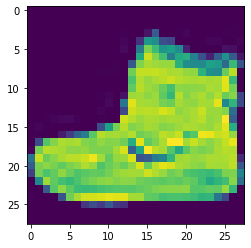

In [ ]:
np.set_printoptions(linewidth=200)
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])

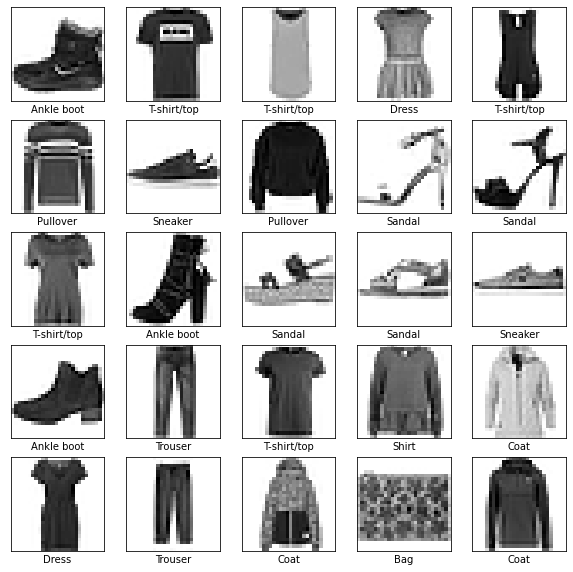

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [ ]:
x_train = x_train/255
x_test  = x_test/255

In [ ]:
keras.backend.image_data_format()

'channels_last'

In [ ]:
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
cnn = keras.Sequential()
cnn.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(128, activation='relu'))
cnn.add(keras.layers.Dropout(0.2))
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
hist = cnn.fit(x_train, y_train,
               batch_size= 100,
               epochs=10,
               verbose=2,
               validation_data=(x_test, y_test),
               callbacks = [keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5),
                            keras.callbacks.ModelCheckpoint('model.hdf5', save_best_only=True, monitor='val_accuracy')]
)

Epoch 1/10
600/600 - 3s - loss: 0.4892 - accuracy: 0.8235 - val_loss: 0.3388 - val_accuracy: 0.8790
Epoch 2/10
600/600 - 3s - loss: 0.2971 - accuracy: 0.8916 - val_loss: 0.3122 - val_accuracy: 0.8872
Epoch 3/10
600/600 - 3s - loss: 0.2464 - accuracy: 0.9090 - val_loss: 0.2557 - val_accuracy: 0.9105
Epoch 4/10
600/600 - 3s - loss: 0.2136 - accuracy: 0.9218 - val_loss: 0.2434 - val_accuracy: 0.9126
Epoch 5/10
600/600 - 3s - loss: 0.1877 - accuracy: 0.9307 - val_loss: 0.2299 - val_accuracy: 0.9139
Epoch 6/10
600/600 - 3s - loss: 0.1587 - accuracy: 0.9410 - val_loss: 0.2278 - val_accuracy: 0.9201
Epoch 7/10
600/600 - 2s - loss: 0.1366 - accuracy: 0.9490 - val_loss: 0.2468 - val_accuracy: 0.9189
Epoch 8/10
600/600 - 2s - loss: 0.1167 - accuracy: 0.9561 - val_loss: 0.2402 - val_accuracy: 0.9200
Epoch 9/10
600/600 - 3s - loss: 0.0998 - accuracy: 0.9628 - val_loss: 0.2524 - val_accuracy: 0.9221
Epoch 10/10
600/600 - 3s - loss: 0.0851 - accuracy: 0.9675 - val_loss: 0.2618 - val_accuracy: 0.9232

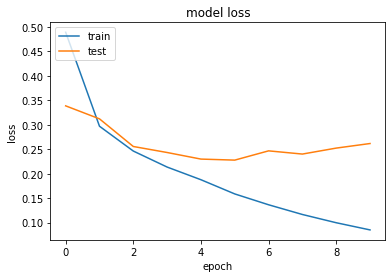

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

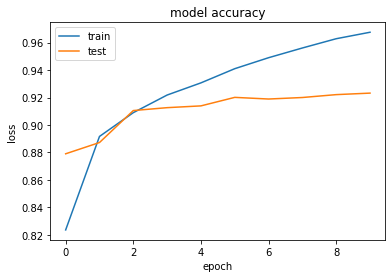

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!ls -la

total 9956
drwxr-xr-x 1 root root     4096 Jul  5 12:57 .
drwxr-xr-x 1 root root     4096 Jul  5 12:51 ..
drwxr-xr-x 1 root root     4096 Jun 26 16:26 .config
-rw-r--r-- 1 root root 10174496 Jul  5 12:57 model.hdf5
drwxr-xr-x 1 root root     4096 Jun 26 16:26 sample_data


In [ ]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [ ]:
!ls  /root/.keras/datasets/

fashion-mnist


In [ ]:
!ls  /root/.keras/datasets/fashion-mnist/

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [ ]:
print(' X_test : \t{}'.format(x_test.shape))
print(' X_train: \t{}'.format(x_train.shape))
print(' y_test : \t{}'.format(y_test.shape))
print(' y_train: \t{}'.format(y_train.shape))

 X_test : 	(10000, 28, 28, 1)
 X_train: 	(60000, 28, 28, 1)
 y_test : 	(10000, 10)
 y_train: 	(60000, 10)


In [ ]:
x_train = x_train*255

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range = [-3, 3],
                                   height_shift_range = [-3,3],
                                   horizontal_flip = True,
                                   vertical_flip = False,
                                   rotation_range = 20,
                                   brightness_range = [0.2, 1],
                                   zoom_range = [0.9, 1]
                                   )
it = train_datagen.flow(x_train,
                        y= y_train,
                        batch_size = 64)


In [ ]:
batch = it.next()
images, labels = batch
labels = np.argmax(labels, axis=-1)

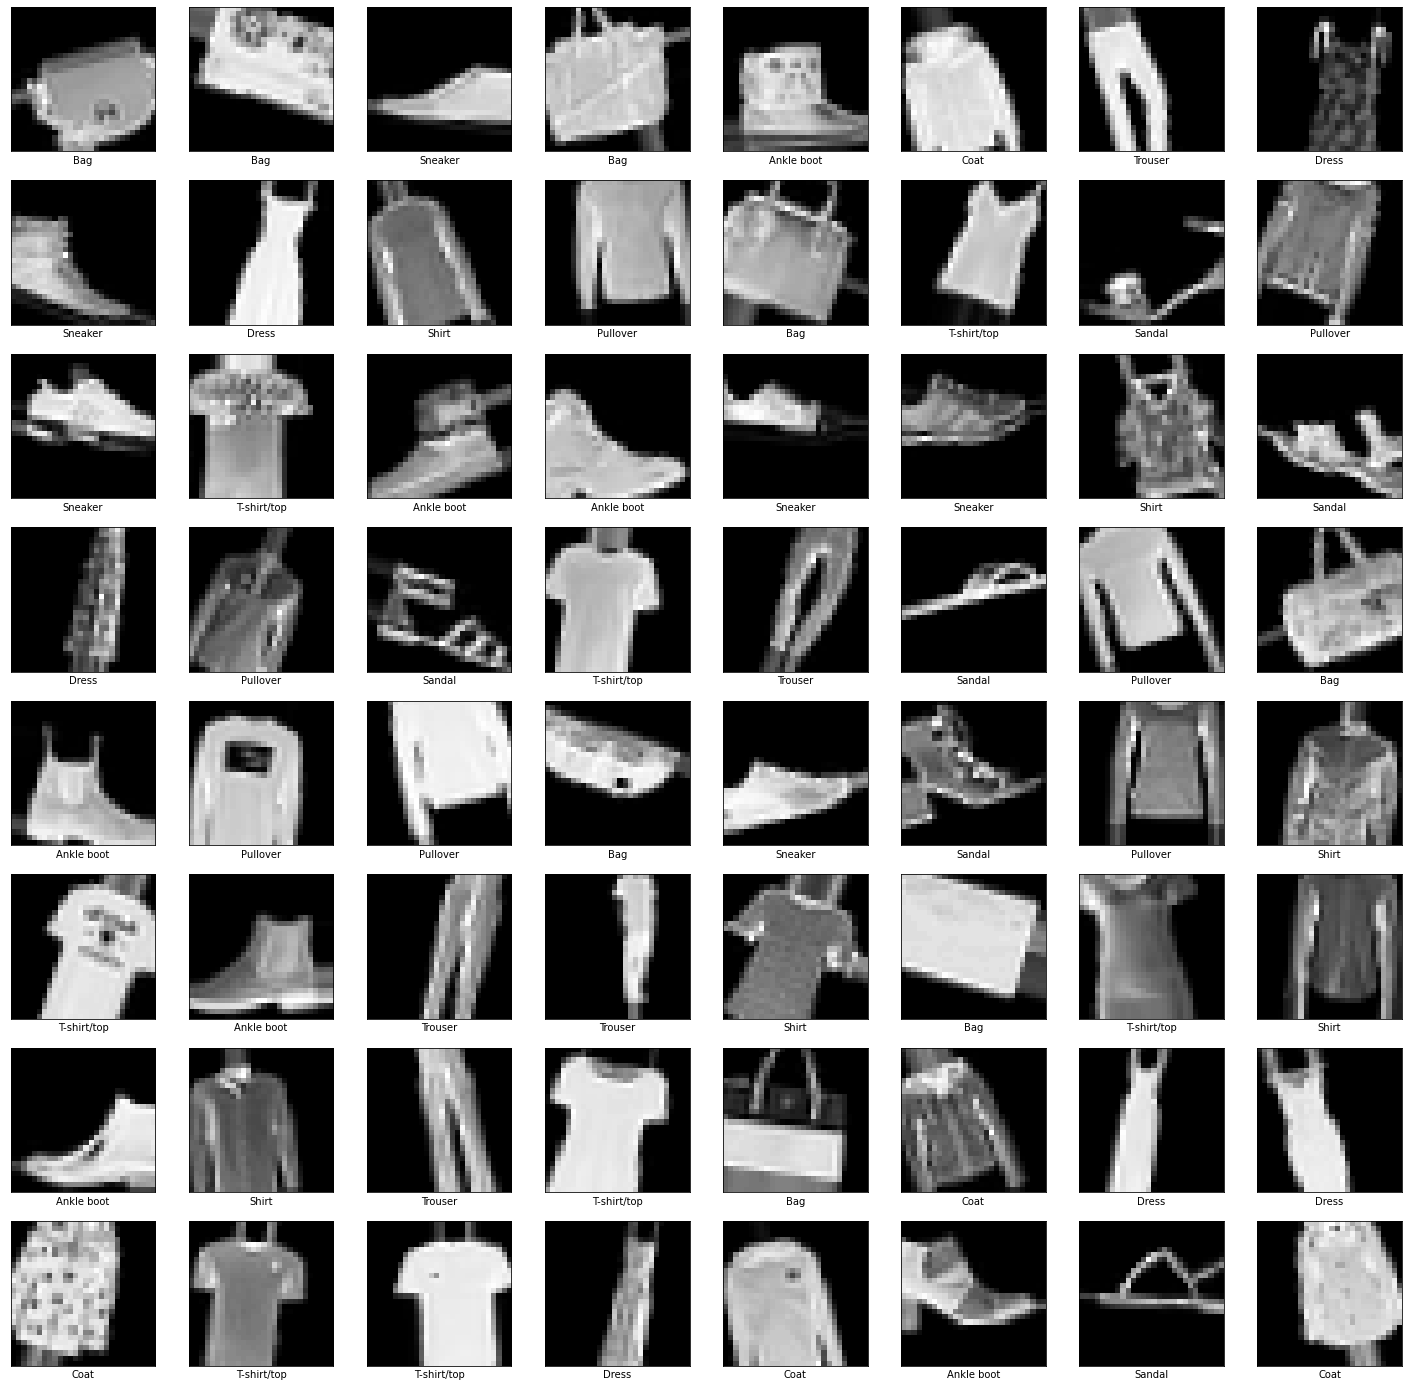

In [ ]:
plt.figure(figsize=(25, 25))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image = images[i]
  plt.imshow(image.reshape(28,28), cmap=plt.cm.gray)
  plt.xlabel(class_names[labels[i]])
# show the figure
plt.show()

In [ ]:
cnn2 = keras.Sequential()
cnn2.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, padding = 'same'))
cnn2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

cnn2.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn2.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

cnn2.add(keras.layers.Flatten())

cnn2.add(keras.layers.Dense(128, activation='relu'))
cnn2.add(keras.layers.Dropout(0.35))
cnn2.add(keras.layers.Dense(64, activation='relu'))
cnn2.add(keras.layers.Dropout(0.35))
cnn2.add(keras.layers.Dense(10, activation='softmax'))

cnn2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [ ]:
hist2 = cnn2.fit_generator(
    it,
    steps_per_epoch = 930,
    verbose = 2,
    epochs = 30,
    validation_data = (x_test, y_test),
    callbacks = [keras.callbacks.ModelCheckpoint('model2.hdf5', save_best_only=True, monitor='val_accuracy')]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
930/930 - 24s - loss: 1.0047 - accuracy: 0.6292 - val_loss: 0.7265 - val_accuracy: 0.7230
Epoch 2/30
930/930 - 24s - loss: 0.6808 - accuracy: 0.7440 - val_loss: 0.6731 - val_accuracy: 0.7490
Epoch 3/30
930/930 - 24s - loss: 0.6015 - accuracy: 0.7762 - val_loss: 0.6305 - val_accuracy: 0.7579
Epoch 4/30
930/930 - 24s - loss: 0.5477 - accuracy: 0.7975 - val_loss: 0.5735 - val_accuracy: 0.7804
Epoch 5/30
930/930 - 24s - loss: 0.5069 - accuracy: 0.8166 - val_loss: 0.6276 - val_accuracy: 0.7589
Epoch 6/30
930/930 - 24s - loss: 0.4768 - accuracy: 0.8267 - val_loss: 0.6476 - val_accuracy: 0.7556
Epoch 7/30
930/930 - 24s - loss: 0.4573 - accuracy: 0.8366 - val_loss: 0.5844 - val_accuracy: 0.7677
Epoch 8/30
930/930 - 24s - loss: 0.4338 - accuracy: 0.8428 - val_loss: 0.5423 - val_accuracy: 0.7860
Epoch 9/30
930/930 - 24s - loss: 0.4245 - accuracy: 0.8492 - val_loss: 0.5829 - val_accuracy: 0.7710
Epoch 10/30
930

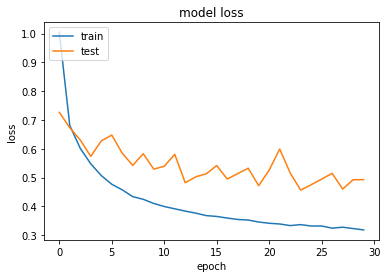

In [ ]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

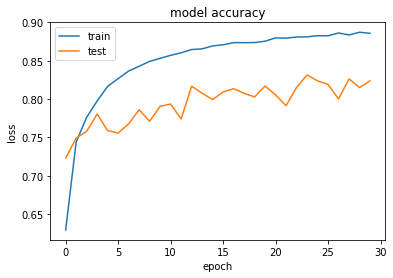

In [ ]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
del(cnn)
del(cnn2)

In [ ]:
model = keras.models.load_model('model.hdf5')
model2 =  keras.models.load_model('model2.hdf5')

In [ ]:
loss1, acc1 = model.evaluate(x_test, y_test)
loss2, acc2 = model2.evaluate(x_test, y_test)
print('first model')
print('loss   : {}'.format(loss1))
print('acc    : {}'.format(acc1))
print('second model (using data augmentation )')
print('loss   : {}'.format(loss2))
print('acc    : {}'.format(acc2))

313/313 [==============================] - 1s 2ms/step - loss: 0.4565 - accuracy: 0.8315
first model
loss   : 0.2617620527744293
acc    : 0.9232000112533569
second model (using data augmentation )
loss   : 0.45649731159210205
acc    : 0.8314999938011169
